# Topic Modelling Visualizations

I want to visualize
* the topics of all the articles
* the relative frequencies of comments on different topics
* the relationship between topics in comments to topics in articles
* the relationship between topics in articles and the constructiveness of the comments
* the relationship between topics in articles and the toxicity of the comments
* the relationship between topics in comments and the constructiveness of the comments
* the relationship between topics in comments and the toxicity of the comments
* general trends in the constructiveness of the comments
* general trends in the toxicity of the comments

In [7]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [10]:
socc_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Globe_and_Mail/Globe_analysis/socc_constructiveness_predictions.csv')

In [11]:
socc_comments_stopped = pd.read_csv('/Users/vasundhara/data/socc_comments_stopped.csv', header=None, names=['stopped_text'])

FileNotFoundError: File b'/Users/vasundhara/data/socc_comments_stopped.csv' does not exist

In [16]:
socc_combined = socc_constructiveness#.join(socc_comments_stopped).dropna()

In [17]:
socc_const_plot = socc_combined.groupby('constructive_prediction').mean().reset_index().melt(id_vars=['constructive_prediction']).rename({'variable' : 'Feature', 'value' : 'Value', 'constructive_prediction' : 'Constructive'}, axis=1)
socc_const_plot.head()

,Constructive,Feature,Value
0,0,has_conjunctions_and_connectives,0.850253
1,1,has_conjunctions_and_connectives,0.999726
2,0,has_stance_adverbials,0.096322
3,1,has_stance_adverbials,0.350132
4,0,has_reasoning_verbs,0.668164


In [18]:
set(list(socc_const_plot['Feature']))

{'average_word_length',
 'avg_words_per_sent',
 'has_conjunctions_and_connectives',
 'has_modals',
 'has_reasoning_verbs',
 'has_shell_nouns',
 'has_stance_adverbials',
 'length',
 'nSents',
 'named_entity_count',
 'ncaps',
 'noov',
 'personal_exp_score',
 'readability_score'}

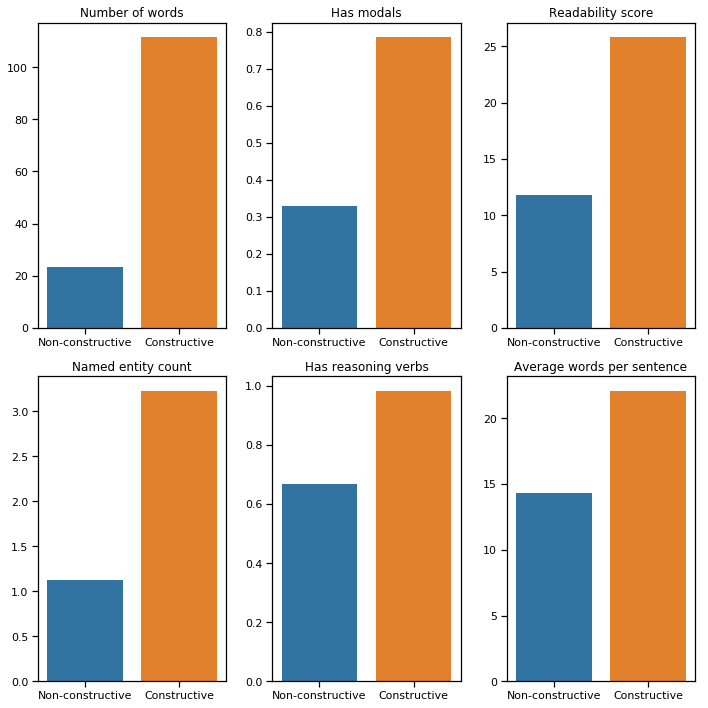

In [25]:
sns.set_context('notebook')
fig = plt.figure(figsize=(10,10))

features = ['length', 'has_modals', 'readability_score', 'named_entity_count', 'has_reasoning_verbs', 'avg_words_per_sent']
human_readable = ['Number of words', 'Has modals', 'Readability score', 'Named entity count', 'Has reasoning verbs', 'Average words per sentence']
# features = set(list(socc_const_plot['Feature']))
axes = []

for index,feature in enumerate(features):
    ax = plt.subplot(2, 3, index+1)
    ax.set_title(human_readable[index])#, fontsize=30)
    sns.barplot(socc_const_plot[socc_const_plot['Feature'] == feature]['Constructive'],
                socc_const_plot[socc_const_plot['Feature'] == feature]['Value'])#,
#                 palette=['yellow', 'blue'])
    plt.xlabel('')
    plt.ylabel('')
    ax.set_xticklabels(['Non-constructive', 'Constructive'])
plt.tight_layout()
plt.savefig('constr.png')

In [253]:
def flatten(series):
    tokens = list(word
     for comment in series.str.split()
     for word in comment)
    return pd.DataFrame(tokens).rename({0 : 'token'}, axis=1)

In [328]:
def createWordCloud(df):
    wordcloud_text = ''
    for [token,frequency] in df.values:
        wordcloud_text += (token + ' ') * frequency
        
    wordcloud = WordCloud(stopwords=[]).generate(wordcloud_text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)

In [327]:
flattened = flatten(socc_combined.groupby('constructive_prediction').get_group(0)['stopped_text'])
frequencies_non_constructive = flattened['token'].value_counts().head(20).reset_index().rename({'index' : 'token', 'token' : 'frequency'}, axis=1)
frequencies_non_constructive

,token,frequency
0,Harper,4628
1,people,4354
2,Canada,3485
3,government,2726
4,time,2575
5,good,2307
6,make,1949
7,years,1904
8,Ford,1880
9,article,1878


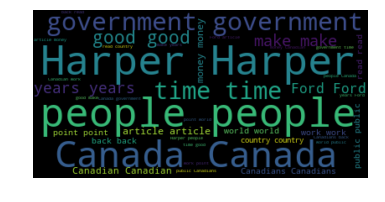

In [329]:
createWordCloud(frequencies_non_constructive)
plt.show()

In [330]:
flattened = flatten(socc_combined.groupby('constructive_prediction').get_group(1)['stopped_text'])
frequencies_constructive = flattened['token'].value_counts().head(20).reset_index().rename({'index' : 'token', 'token' : 'frequency'}, axis=1)
frequencies_constructive

,token,frequency
0,people,16777
1,Canada,12657
2,government,11451
3,Harper,9649
4,time,9204
5,years,8801
6,make,6901
7,Canadian,6892
8,public,6808
9,good,6596


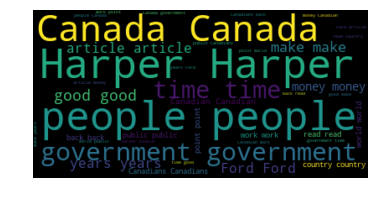

In [331]:
createWordCloud(frequencies_non_constructive)
plt.show()

In [ ]:
wordcloud = WordCloud(stopwords=[]).generate(wordcloud_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

In [3]:
socc_toxicity = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Globe_and_Mail/Globe_analysis/socc_toxicity_predictions.csv', low_memory=False)

In [4]:
socc_toxicity.columns

Index(['article_id', 'comment_counter', 'comment_author', 'timestamp',
       'post_time', 'comment_text', 'TotalVotes', 'posVotes', 'negVotes',
       'vote', 'reactions', 'replies', 'comment_id', 'parentID', 'threadID',
       'streamId', 'edited', 'isModerator', 'highlightGroups', 'moderatorEdit',
       'descendantsCount', 'threadTimestamp', 'flagCount', 'sender_isSelf',
       'sender_loginProvider', 'data_type', 'is_empty', 'status',
       'SEVERE_TOXICITY_probability', 'SEXUALLY_EXPLICIT_probability',
       'TOXICITY_probability', 'TOXICITY_IDENTITY_HATE_probability',
       'TOXICITY_INSULT_probability', 'TOXICITY_OBSCENE_probability',
       'TOXICITY_THREAT_probability', 'ATTACK_ON_AUTHOR_probability',
       'ATTACK_ON_COMMENTER_probability', 'ATTACK_ON_PUBLISHER_probability',
       'INCOHERENT_probability', 'INFLAMMATORY_probability',
       'LIKELY_TO_REJECT_probability', 'OBSCENE_probability',
       'OFF_TOPIC_probability', 'SPAM_probability',
       'UNSUBSTANTIAL_pr

In [5]:
socc_toxicity[['comment_text', 'TOXICITY_probability']].head()

,comment_text,TOXICITY_probability
0,ANy physician or specialist will put a block o...,0.502267
1,"I don't mess around in YOUR contract, don't me...",0.230638
2,...And the CFIB is an entirely balanced source...,0.118950
3,ManCityFC: If you think its 'baloney' then you...,0.252292
4,"If you want the market to decide, get ready fo...",0.104049


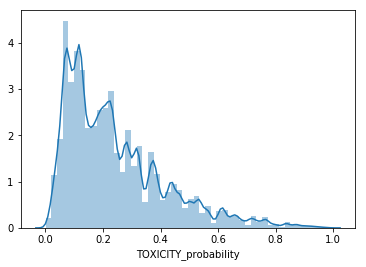

In [6]:
sns.distplot(socc_toxicity['TOXICITY_probability'])

In [7]:
socc_toxicity.head()

,article_id,comment_counter,comment_author,timestamp,post_time,comment_text,TotalVotes,posVotes,negVotes,vote,...,ATTACK_ON_AUTHOR_probability,ATTACK_ON_COMMENTER_probability,ATTACK_ON_PUBLISHER_probability,INCOHERENT_probability,INFLAMMATORY_probability,LIKELY_TO_REJECT_probability,OBSCENE_probability,OFF_TOPIC_probability,SPAM_probability,UNSUBSTANTIAL_probability
0,10030963,source1_10030963_48_7,redrider,1.363901e+12,NaN,ANy physician or specialist will put a block o...,0.0,NaN,NaN,none,...,0.011664,0.099429,0.000960,0.740112,0.718565,0.948278,0.983082,0.286131,0.030577,0.050918
1,10030963,source1_10030963_50,QueeerAvenger,1.363880e+12,NaN,"I don't mess around in YOUR contract, don't me...",0.0,NaN,NaN,none,...,0.641564,0.813495,0.013181,0.884980,0.606076,0.804560,0.193370,0.426974,0.040368,0.186657
2,10030963,source1_10030963_55_2,MMackinnon,1.363895e+12,NaN,...And the CFIB is an entirely balanced source...,0.0,NaN,NaN,none,...,0.294319,0.597144,0.092054,0.807325,0.284626,0.560174,0.415909,0.415891,0.040214,0.751994
3,10030963,source1_10030963_62_1,grandmommy10,1.363879e+12,NaN,ManCityFC: If you think its 'baloney' then you...,0.0,NaN,NaN,none,...,0.185482,0.623893,0.012967,0.210963,0.088889,0.119376,0.036157,0.272212,0.027434,0.082336
4,10030963,source1_10030963_76_3,Rocksteady,1.363886e+12,NaN,"If you want the market to decide, get ready fo...",0.0,NaN,NaN,none,...,0.010110,0.246381,0.007246,0.321461,0.080705,0.184711,0.020682,0.418729,0.046753,0.397483


In [8]:
socc_constructiveness.head()

,pp_comment_text,constructive,has_conjunctions_and_connectives,has_stance_adverbials,has_reasoning_verbs,has_modals,has_shell_nouns,length,average_word_length,ncaps,noov,readability_score,personal_exp_score,named_entity_count,nSents,avg_words_per_sent,pos,constructive_prediction
0,I think the program needs some work and probab...,?,1,1,1,1,1,76,7.355,1,14,26.2,0.011,3,3,33.333,PRON VERB DET NOUN VERB DET NOUN CCONJ ADV DET...,1
1,This is just 'offshoring' in reverse as well a...,?,1,0,1,0,1,43,5.047,0,10,16.3,0.023,1,3,17.667,DET VERB ADV PUNCT VERB PUNCT ADV ADV ADV ADV ...,0
2,How do you spell exploitation? This is a disgu...,?,1,0,0,1,1,28,5.429,1,3,12.9,0.036,2,4,8.000,ADV VERB PRON VERB NOUN PUNCT DET VERB DET ADJ...,0
3,TFWs have a place in the economy. Most Canadia...,?,1,0,1,1,1,90,4.644,1,12,22.9,0.000,2,6,16.833,NOUN VERB DET NOUN ADP DET NOUN PUNCT ADJ PROP...,1
4,Why should temporary workers get paid more?? H...,?,1,0,1,1,1,79,5.114,10,10,22.9,0.000,4,6,14.833,ADV VERB ADJ NOUN VERB VERB ADJ PUNCT PUNCT AD...,1


In [9]:
len(socc_constructiveness)

663173

In [10]:
len(socc_toxicity)

663173

In [11]:
combined = socc_constructiveness.merge(socc_toxicity, left_on='pp_comment_text', right_on='comment_text')[['pp_comment_text', 'constructive_prediction', 'TOXICITY_probability']].drop_duplicates()

In [12]:
combined.groupby('constructive_prediction').count()

,pp_comment_text,TOXICITY_probability
constructive_prediction,,
0,401935,401935
1,231130,231130


In [13]:
combined['toxicity_category'] = ((np.floor(combined['TOXICITY_probability'] * 100.0) - (np.floor(combined['TOXICITY_probability'] * 100.0) % 10)) + 5).astype(int)

In [14]:
combined.head()

,pp_comment_text,constructive_prediction,TOXICITY_probability,toxicity_category
0,I think the program needs some work and probab...,1,0.122059,15
1,This is just 'offshoring' in reverse as well a...,0,0.118150,15
2,How do you spell exploitation? This is a disgu...,0,0.433540,45
3,TFWs have a place in the economy. Most Canadia...,1,0.129228,15
4,Why should temporary workers get paid more?? H...,1,0.159348,15


(array([106288., 111888.,  71519.,  43530.,  25927.,  16969.,  12551.,
          7854.,   3977.,   1432.]),
 array([ 5., 14., 23., 32., 41., 50., 59., 68., 77., 86., 95.]),
 <a list of 10 Patch objects>)

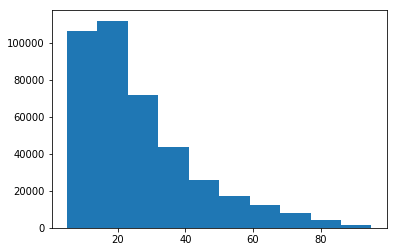

In [15]:
plt.hist(combined.groupby('constructive_prediction').get_group(0)['toxicity_category'])

(array([3.2184e+04, 6.7009e+04, 5.8267e+04, 3.6261e+04, 1.9069e+04,
        1.0083e+04, 5.6420e+03, 2.1290e+03, 4.5100e+02, 3.5000e+01]),
 array([ 5., 14., 23., 32., 41., 50., 59., 68., 77., 86., 95.]),
 <a list of 10 Patch objects>)

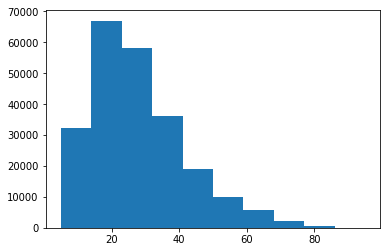

In [16]:
plt.hist(combined.groupby('constructive_prediction').get_group(1)['toxicity_category'])

In [46]:
list(combined[(combined['TOXICITY_probability'] < 0.05) & (combined['constructive_prediction'] == 0)]['pp_comment_text'])

["Problem is most workers don't have a pension or healthcare benefits let alone short and long term disability plans.",
 'The massive increase in OAS is due to income splitting for those with high incomes in retirement and defined benefit pension. A $72,000 income in retirement still entitles one to full OAS.',
 "Analog, $800/yr has been the same since the 50's when secretaries wanted something like what their EX's rec'd for performance pay. It hasn't changed since it was created.",
 'Google CFIB Wage Watch. Average value of compensation packages in the public sector for same work are 25-42% higher. The study was compiled by Statscan based on the 2006 census.',
 "I have been with the same company for 20 years. I am 'allowed' 6 six days per year. I average 1.25 sick days per year.",
 'Until we provide like pensions, benefits, healthcare and working conditions for all, DANDON is right.',
 "Okay, so since a lot of the work/functions the civil service provides really has no private sector 

In [47]:
list(combined[(combined['TOXICITY_probability'] < 0.05) & (combined['constructive_prediction'] == 1)]['pp_comment_text'])

["under current rules, gov't sick days must be exhausted before one can go on disability and one must get a note from a doctor for more than two (or three?) days in a row. but, if you have the flu, you think you are going to be able to get to your doctor before you're recovered and back at work anyway? assuming you are lucky enough to have a doctor...",
 'With nine federal statutory holidays the breakdown for randomly distributed sick days adjacent to a weekend or holiday is as follows: single day: 42%two consecutive days: 53%three consecutive days: 72%four or more consecutive days: 100%Making the not unreasonable assumption that single-day absences are twice as common as two-day ones, four times as common as three-day ones, and eight times as common as longer ones, then the expected proportion of absences falling adjacent to a weekend or holiday is... 61%.',
 "Example: Here are 11 fictional home prices. 1.$100,0002.$101,0003.$102,0004.$103,0005.$104,0006.$105,0007.$106,0008.$107,0009.

In [48]:
"""Well, as per usual, Jim Stanford has raised some valid points. But, I would argue that we as a nation should strive and invest the necessary funds to develop both the economic sectors, be it manufacturing and oil extraction. At the end of the day, all of Canada and our economy will benefit if we can get a reasonable, functioning balance in between the two. To somehow disregard the simple fact that Alberta (and other parts of Canada) is 'sitting on' trillions of dollars worth of oil is void of all logic and economic sense. So, by all means, let's invest the necessary funds in manufacturing and productivity, but, let's not deny the economic reality of oil and natural resources. ."""

"Well, as per usual, Jim Stanford has raised some valid points. But, I would argue that we as a nation should strive and invest the necessary funds to develop both the economic sectors, be it manufacturing and oil extraction. At the end of the day, all of Canada and our economy will benefit if we can get a reasonable, functioning balance in between the two. To somehow disregard the simple fact that Alberta (and other parts of Canada) is 'sitting on' trillions of dollars worth of oil is void of all logic and economic sense. So, by all means, let's invest the necessary funds in manufacturing and productivity, but, let's not deny the economic reality of oil and natural resources. ."

In [44]:
print(' '. join(list(combined[(combined['TOXICITY_probability'] > 0.97) & (combined['constructive_prediction'] == 0)]['pp_comment_text'])))

You are a moron. well kim you are a first class idiot what an idiot... wow You really are stupid. In public. In print. What a goof. bilzy - shut the up f*ck!! You're an idiot. You are an ignorant fool. Oh they are - voted for them three times ....Idiots ! your an idiot............ your an idiot. Gawd, you're stupid. You're such an idiot. Wonderfully stupid mixed metaphor, mangled sentences, dumb thinking process. Probably a product of the commercial university system. Of course Suzuki is a hypocrite and an idiot but he is a CBC idiot. You're paranoia is coming through, loud and clear; that, and the fact you're an idiot. Religious idiots! Gary Mason is an idiot. You sir are a total idiot What an I D I O T Its how stupid fascist pigs think. Yet another idiot! Just quite .... you are a bigger idiot than Malumba! another hint: you're an idiot!!!! @JM201. You are an ignorant fool Idiots. Abbot is a complete imbecile. You are an imbecile! I D I O T! He is simply an idiot! trudeau is an idiot

In [38]:
"""The Globe and Mail pretty much nauseates me - not because of writers, but because in the face of everything that Harper was going to do, and threatened to do to Canada - they endorsed him. They endorsed a destructive monster and set him loose on Canada. Thanks a lot, assholes*."""

'The Globe and Mail pretty much nauseates me - not because of writers, but because in the face of everything that Harper was going to do, and threatened to do to Canada - they endorsed him. They endorsed a destructive monster and set him loose on Canada. Thanks a lot, assholes*.'

In [39]:
"""You are an idiot. In fact teachers have been against this change for years. Not that they don't believe in the value of Discovery learning etc, they struggle with how to actually implement it its practical sense. The reason we aren't already doing discovery math (for instance) with regularity is because of teacher resistence to change. Once again you, like many, try to demonize a whole demographic. Teacher are a convenient target. As if they are fundamentally different than any of the rest of us."""

"You are an idiot. In fact teachers have been against this change for years. Not that they don't believe in the value of Discovery learning etc, they struggle with how to actually implement it its practical sense. The reason we aren't already doing discovery math (for instance) with regularity is because of teacher resistence to change. Once again you, like many, try to demonize a whole demographic. Teacher are a convenient target. As if they are fundamentally different than any of the rest of us."

In [40]:
"""Only a complete idiot would blame a shrinking middle class on rising prices... what about the price rises from 1945 to 1975 - when the middle class was booming??? Also note that was the time of the highest taxation in history. You idiots have been bamboozled by the 1% stealing all the wealth from the rest of us, cutting jobs and salaries - THAT my friend is what has shrunk the middle class !! Alas the more and more we cut taxes and transfer wealth to the 1% - the worse and worse of everyone else is. Yet you morons yell more more more - make us EVEN WORSE off !!!"""

'Only a complete idiot would blame a shrinking middle class on rising prices... what about the price rises from 1945 to 1975 - when the middle class was booming??? Also note that was the time of the highest taxation in history. You idiots have been bamboozled by the 1% stealing all the wealth from the rest of us, cutting jobs and salaries - THAT my friend is what has shrunk the middle class !! Alas the more and more we cut taxes and transfer wealth to the 1% - the worse and worse of everyone else is. Yet you morons yell more more more - make us EVEN WORSE off !!!'

In [18]:
combined.groupby(['constructive_prediction', 'toxicity_category']).count().reset_index().pivot('toxicity_category', 'constructive_prediction')['pp_comment_text']

constructive_prediction,0,1
toxicity_category,,
5,106288,32184
15,111888,67009
25,71519,58267
35,43530,36261
45,25927,19069
55,16969,10083
65,12551,5642
75,7854,2129
85,3977,451


In [19]:
grouped = combined.groupby(['constructive_prediction', 'toxicity_category']).count().reset_index()
pivoted = grouped.pivot('constructive_prediction', 'toxicity_category')['pp_comment_text']

In [20]:
grouped

,constructive_prediction,toxicity_category,pp_comment_text,TOXICITY_probability
0,0,5,106288,106288
1,0,15,111888,111888
2,0,25,71519,71519
3,0,35,43530,43530
4,0,45,25927,25927
5,0,55,16969,16969
6,0,65,12551,12551
7,0,75,7854,7854
8,0,85,3977,3977
9,0,95,1432,1432


In [21]:
mpg = sns.load_dataset("mpg")

In [22]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


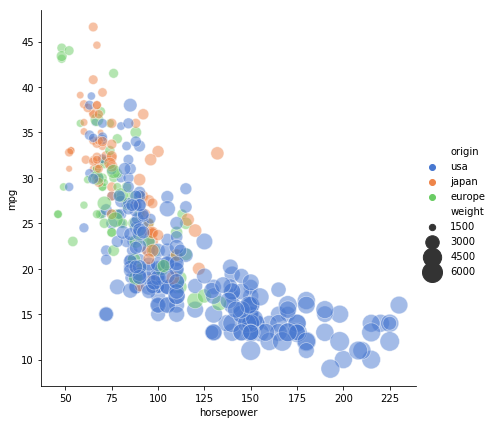

In [23]:
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

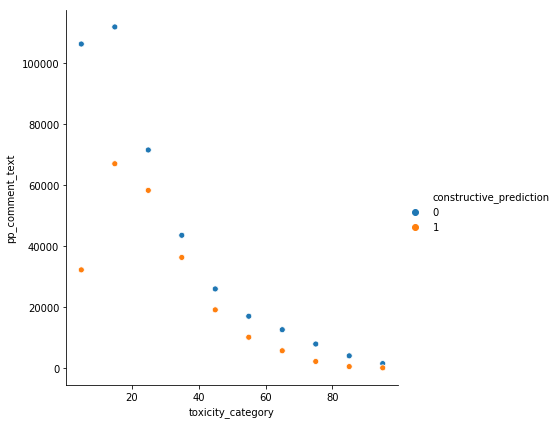

In [29]:
sns.relplot(x='toxicity_category', y='pp_comment_text', hue='constructive_prediction',
            sizes=(40, 400), height=6, data=grouped)

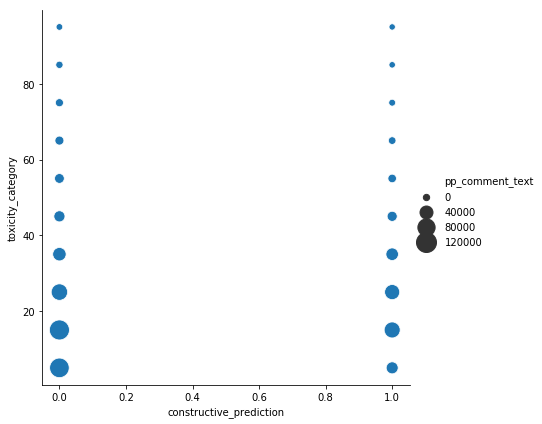

In [31]:
sns.relplot(y='toxicity_category', size='pp_comment_text', x='constructive_prediction',
            sizes=(40, 400), height=6, data=grouped)

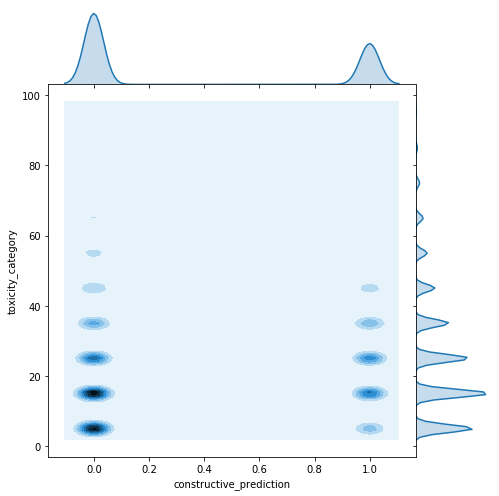

In [33]:
g = sns.jointplot(combined['constructive_prediction'], combined['toxicity_category'], kind="kde", height=7, space=0)

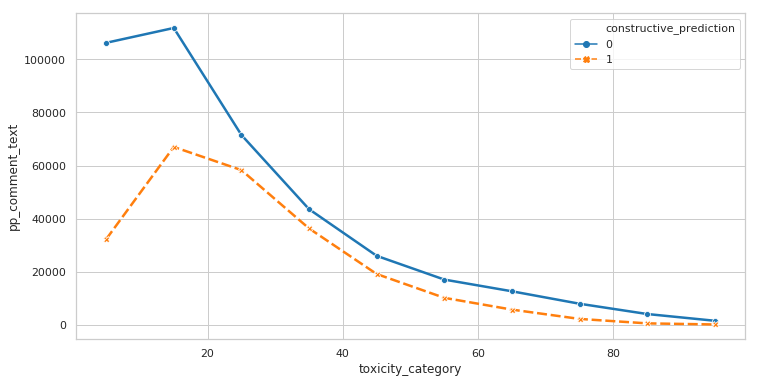

In [57]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set(style="whitegrid")
sns.lineplot(data=grouped , x='toxicity_category', y='pp_comment_text',
             hue='constructive_prediction', style='constructive_prediction',
             palette="tab10", linewidth=2.5, markers=True)

In [ ]:
sns.scatterplot(data=combined , x='toxicity_category', y='pp_comment_text',
             hue='constructive_prediction', style='constructive_prediction',
             palette="tab10")# linewidth=2.5)
                
#     x="carat", y="price",
#                 hue="clarity", size="depth",
#                 palette="ch:r=-.2,d=.3_r",
#                 hue_order=clarity_ranking,
#                 sizes=(1, 8), linewidth=0,
#                 data=diamonds, ax=ax)

--- Logging error ---
Traceback (most recent call last):
  File "/anaconda3/envs/usra/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda3/envs/usra/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/envs/usra/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda3/envs/usra/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda3/envs/usra/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda3/envs/usra/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda3/envs/usra/lib/pyth

In [56]:
sns.set_context('talk')

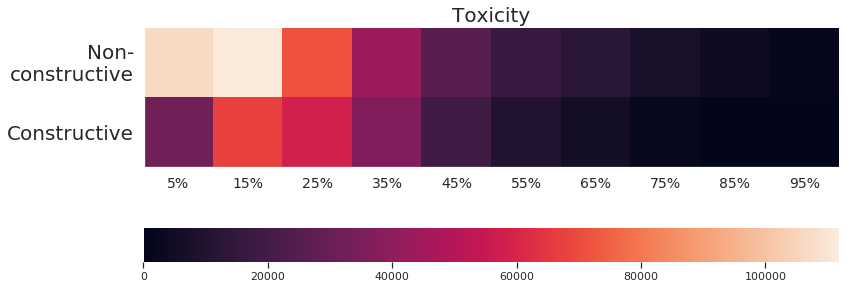

In [192]:
sns.set(rc={'figure.figsize':(12,6)})
# ax = plt.figure(figsize=(9.0,6.0))
sns.heatmap(pivoted, square=True, yticklabels=['Non-\nconstructive', 'Constructive'],
            xticklabels=['5%', '15%', '25%', '35%', '45%', '55%', '65%', '75%', '85%', '95%'],
            cbar_kws={"orientation": "horizontal"})
# plt.title('Distribution of comments')
plt.yticks(rotation=0, fontsize=20)
plt.xticks(fontsize=14)
plt.xlabel('', fontsize=20)
plt.ylabel('')
plt.tight_layout()
sns.despine()
plt.title('Toxicity', fontsize=20)
# plt.show()
plt.savefig('socc_comment_heatmap.png')